# Camada de Convolução
---
### Este caderno foi baseado no curso de visão computacional da [Udacity](https://www.udacity.com/)
Visualizaremos quatro saídas filtradas (mapas de características) de uma camada de convolução.

### Importe a imagem

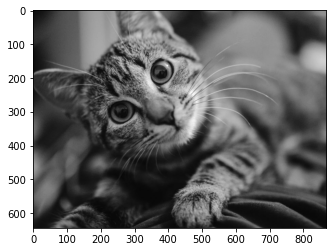

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Caso quiser mudar a imagem, mude aqui
img_path = 'images/gato.jpg'

# carregue a imagem colorida
bgr_img = cv2.imread(img_path)
# converta para escala de cinza
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize e rescale entrada para ficarem [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

### Defina e Visualize os Filtros

In [2]:
import numpy as np

# Caso quiser modificar os números, tente outro filtro
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Formato do Filtro: ', filter_vals.shape)


Formato do Filtro:  (4, 4)


In [3]:
# Definindo 4 filtros diferentes
# Todos são combinações lineares do filtro definido em cima

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Imprimindo valores do filtro 2, por exemplo
print('Filtro 2: \n', filter_2)

Filtro 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]


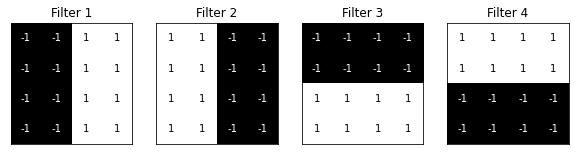

In [4]:
# Visualizando todos os quatro filtros
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### Definindo uma camada de convolução 

Inicializando uma única camada de convolução que contenha os filtros criados

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# Defina a rede neural com uma única camada de convolução com 4 filtros
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # Inicializa os pesos da camada de convolução para serem os pesos dos 4 filtros definidos
        k_height, k_width = weight.shape[2:]
        # Assume que existem 4 filtros de cinza escala
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # Calcula a saída da camada de convolução
        # pré e pós função de ativação
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # retorna ambas as camadas
        return conv_x, activated_x
    
# instancia o modelo e o conjunto de pesos
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# imprime a camada 
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualizar a saída de cada filtro

In [6]:
# Função para visualizar a saída de uma camada 
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

Visualizar a saída da camada de convolução, antes e depois da aplicação da função de ativação.

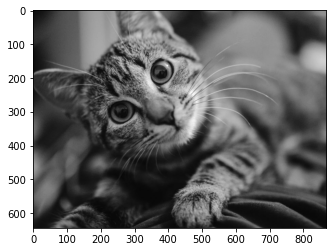

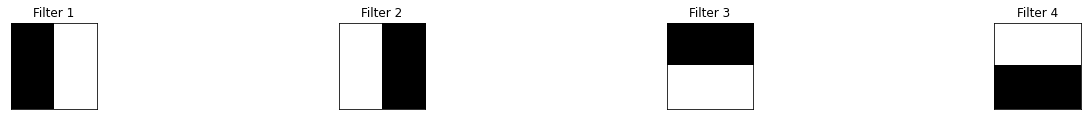

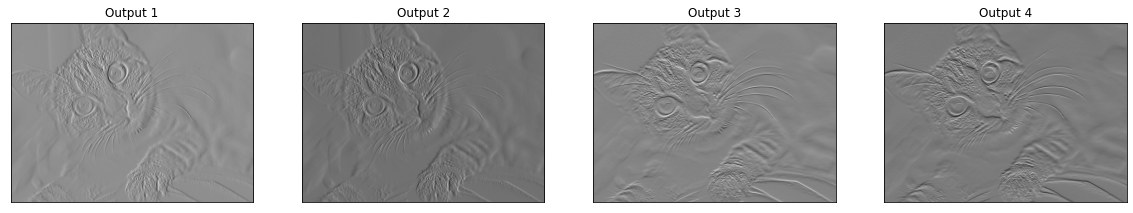

In [7]:
# plot da função original
plt.imshow(gray_img, cmap='gray')

# Visualização de todos os filtros
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# Converter a imagem em um Tensor de entrada
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# Obter a camada de convolução (pre e pós ativação)
conv_layer, activated_layer = model(gray_img_tensor)

# Visualizar a saída da camada de convolução
viz_layer(conv_layer)

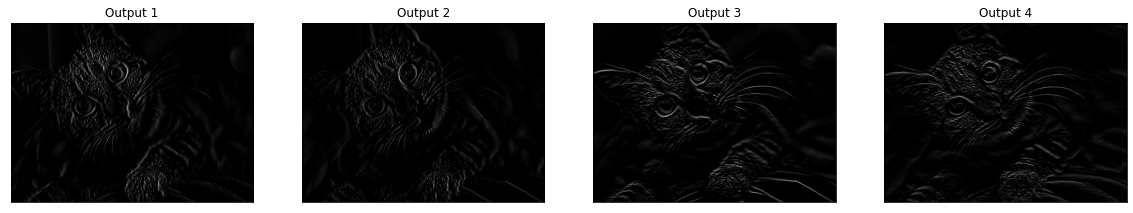

In [8]:
# Após a função de ativação ReLu ser aplicada
# Visualizar a saída de uma camada de convolução aplicada
viz_layer(activated_layer)